# 1.Check eligibility of the Customer given the inputs. 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read file

In [2]:
import pandas as pd
A = pd.read_csv("E:/Data Science/ML Mini Project/training_set.csv")

In [3]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


# Missing data treatment

In [4]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from miss import replacer
replacer(A)

In [6]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Delete unnecessary columns

In [7]:
A = A.drop(labels=["Loan_ID"],axis=1)
A.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00,0.0,146.41,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54,1508.0,128.00,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00,0.0,66.00,360.0,1.0,Urban,Y


# Delete special symbols from data

In [8]:
for i in A.columns:
    print("\n",A[i].value_counts())


 Male      502
Female    112
Name: Gender, dtype: int64

 Yes    401
No     213
Name: Married, dtype: int64

 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 No     532
Yes     82
Name: Self_Employed, dtype: int64

 2500.0    9
6000.0    6
2600.0    6
4166.0    5
5000.0    5
         ..
6133.0    1
2058.0    1
2787.0    1
6256.0    1
5829.0    1
Name: ApplicantIncome, Length: 505, dtype: int64

 0.0       273
2083.0      5
1666.0      5
2500.0      5
1459.0      3
         ... 
1695.0      1
2466.0      1
2375.0      1
1842.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

 146.41    22
120.00    20
110.00    17
100.00    15
160.00    12
          ..
211.00     1
250.00     1
62.00      1
85.00      1
436.00     1
Name: LoanAmount, Length: 204, dtype: int64

 360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.

In [9]:
def spe_sym_removal(df):
    raw_dep = []
    for i in df.Dependents:
        i = i.replace("+","")
        raw_dep.append(i)
    
    return raw_dep

In [10]:
new_dep = spe_sym_removal(A)

In [11]:
A[["Dependents"]] = new_dep

In [12]:
A.Dependents.value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

# Declare X and Y

In [13]:
X = A.drop(labels=["Loan_Status"],axis=1)
Y = A[["Loan_Status"]]

# EDA

# 1)Univariant

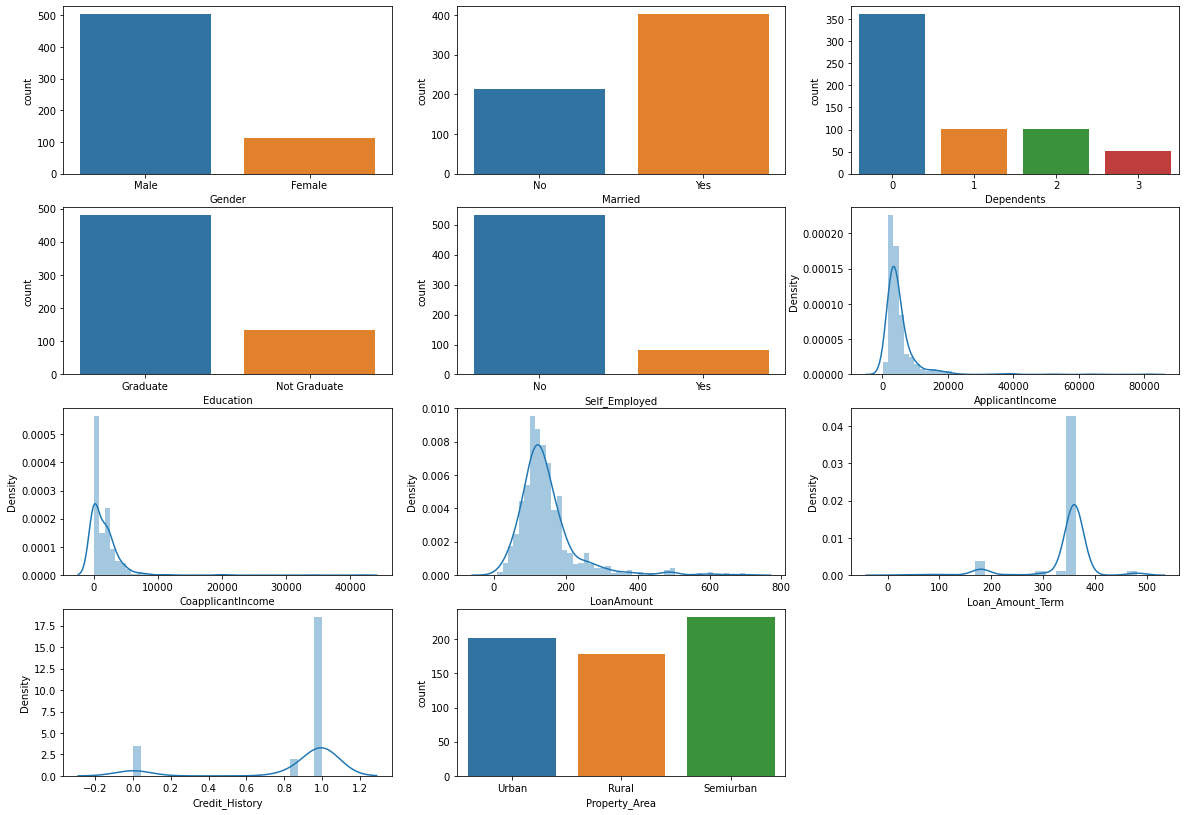

In [14]:
import seaborn as sb
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

# 2)Bivariate

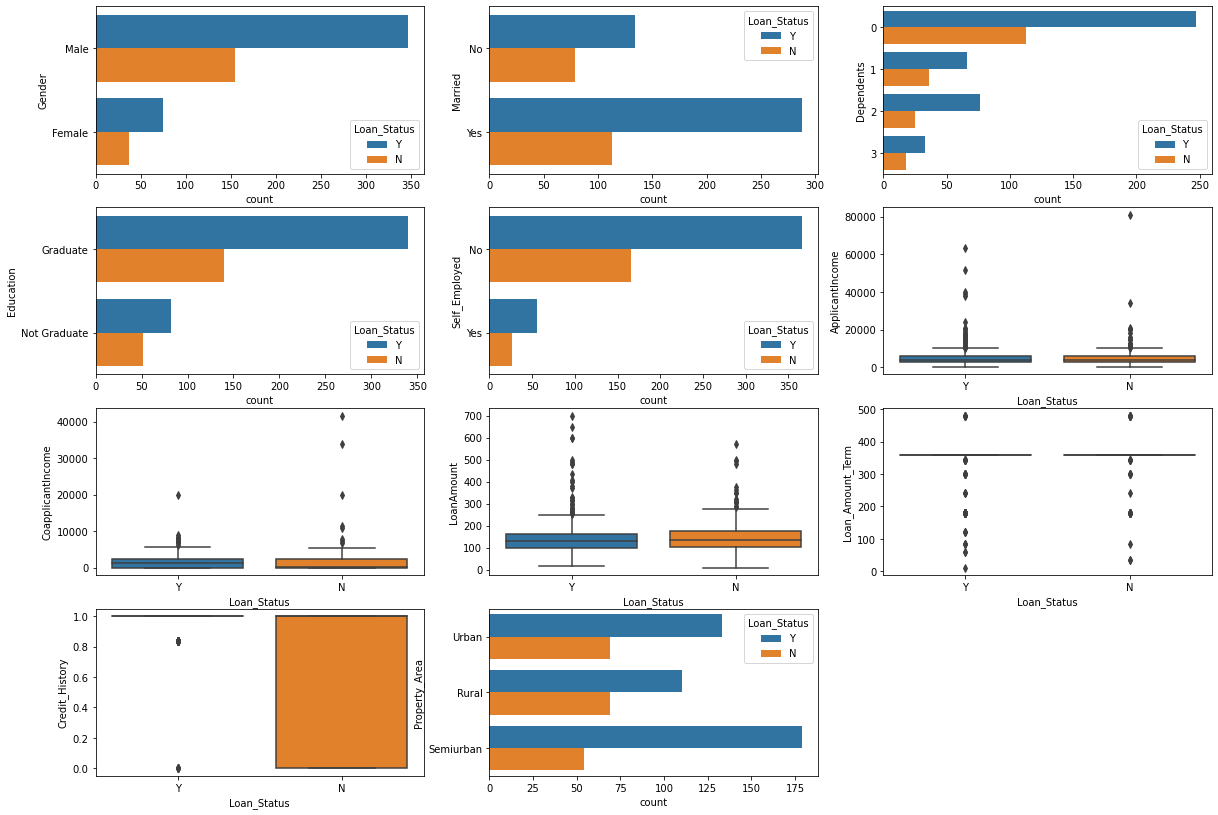

In [15]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(y=X[i],hue=Y.Loan_Status)
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.boxplot(Y.Loan_Status,X[i])
        q = q + 1

# Data Preprocessing

In [16]:
def cat_con_sep(df):
    cat = []
    con = []
    for i in df.columns:
        if df[i].dtype == "object":
            cat.append(i)
        
        else:
            con.append(i)
            
    
    return cat,con

In [17]:
cat, con =  cat_con_sep(X)

In [18]:
X[con].skew()

ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726604
Loan_Amount_Term    -2.389680
Credit_History      -1.962051
dtype: float64

In [19]:
from numpy import log, sqrt
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.ApplicantIncome = log(X.ApplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X[con].skew()

ApplicantIncome      0.477562
CoapplicantIncome    0.980113
LoanAmount          -0.223224
Loan_Amount_Term    -2.389680
Credit_History      -1.962051
dtype: float64

In [20]:
from sklearn.preprocessing import StandardScaler
def preprocessing_data(df,cat,con):
    ss = StandardScaler()
    df1 = pd.get_dummies(df[cat])
    df2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    df3 = df2.join(df1)
    return df3

In [21]:
X = preprocessing_data(X,cat,con)

In [22]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.515465,-0.968030,0.250611,0.279851,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.393196,0.374420,-0.020225,0.279851,0.452152,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.519896,-0.968030,-1.355202,0.279851,0.452152,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,-0.751980,0.710655,-0.150298,0.279851,0.452152,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.554992,-0.968030,0.174728,0.279851,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = pd.DataFrame(le.fit_transform(Y),columns=["Loan_Status"])

In [24]:
X.head(3)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.515465,-0.96803,0.250611,0.279851,0.452152,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.393196,0.37442,-0.020225,0.279851,0.452152,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,-0.519896,-0.96803,-1.355202,0.279851,0.452152,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1


In [25]:
Y.head(3)

,Loan_Status
0,1
1,0
2,1


# Divide X and Y into training and testing

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)

# Creating ML Models and choose one of the best

# 1) Logistic Classifier Model

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_model = lr.fit(xtrain,ytrain)

# Calculating train and test error

In [28]:
from sklearn.metrics import accuracy_score

pred_tr_lrmodel = lr_model.predict(xtrain)
acc_tr_lrmodel = round(accuracy_score(ytrain,pred_tr_lrmodel),4)
print("Logistic Model Train Accuracy: ",acc_tr_lrmodel)

pred_ts_lrmodel = lr_model.predict(xtest)
acc_ts_lrmodel = round(accuracy_score(ytest,pred_ts_lrmodel),4)
print("Logistic Model Test Accuracy: ",acc_ts_lrmodel)

Logistic Model Train Accuracy:  0.8187
Logistic Model Test Accuracy:  0.7805


# 2) Naive Bayes Model

In [29]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(xtrain,ytrain)

# Calculating train and test error

In [30]:
pred_tr_nbmodel = nb_model.predict(xtrain)
acc_tr_nbmodel = round(accuracy_score(ytrain,pred_tr_nbmodel),4)
print("Naive Bayes Model Train Accuracy : ",acc_tr_nbmodel)

pred_ts_nbmodel = nb_model.predict(xtest)
acc_ts_nbmodel = round(accuracy_score(ytest,pred_ts_nbmodel),4)
print("Naive Bayes Model Test Accuracy: ",acc_ts_nbmodel)

Naive Bayes Model Train Accuracy :  0.8106
Naive Bayes Model Test Accuracy:  0.7886


# 3) Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtr_model = DecisionTreeClassifier(random_state=32)
model = dtr_model.fit(xtrain,ytrain)

# Calculating train and test error

In [32]:
pred_tr_dtrmodel = model.predict(xtrain)
acc_tr_dtrmodel = round(accuracy_score(ytrain,pred_tr_dtrmodel),4)
print("Decision Tree Model Train Accuracy: ",acc_tr_dtrmodel)

pred_ts_dtrmodel = model.predict(xtest)
acc_ts_dtrmodel = round(accuracy_score(ytest,pred_ts_dtrmodel),4)
print("Decision Tree Model Test Accuracy: ",acc_ts_dtrmodel)

Decision Tree Model Train Accuracy:  1.0
Decision Tree Model Test Accuracy:  0.6992


# 4) Random Forest Model

# Finding best value for n Estimators, max depth using GridSearchCV

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tg = {"max_depth":range(2,15,1),"n_estimators":range(2,15,1)}
rfr = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfr,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 2, 'n_estimators': 4}

# Creating Random Forest Model

In [34]:
rfr2 = RandomForestClassifier(n_estimators=4, random_state=21, max_depth=2)
model_rfr = rfr2.fit(xtrain,ytrain)

# Calculating train and test error

In [35]:
pred_tr_rfrmodel = model_rfr.predict(xtrain)
acc_tr_rfrmodel = round(accuracy_score(ytrain,pred_tr_rfrmodel),4)
print("Random Forest Model Train Accuracy: ",acc_tr_rfrmodel)

pred_ts_rfrmodel = model_rfr.predict(xtest)
acc_ts_rfrmodel = round(accuracy_score(ytest,pred_ts_rfrmodel),4)
print("Decision Tree Model Test Accuracy: ",acc_ts_rfrmodel)

Random Forest Model Train Accuracy:  0.8147
Decision Tree Model Test Accuracy:  0.7967


# 5) Adaboost Model

# Finding best value for n Estimators, max depth using GridSearchCV

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tg = {"n_estimators":range(2,15,1)}
abm = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abm,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 2}

# Creating Adaboost Model

In [37]:
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=2,random_state=21)
model_abm = boost.fit(xtrain,ytrain)

# Calculating train and test error 

In [38]:
pred_tr_abmmodel = model_abm.predict(xtrain)
acc_tr_abmmodel = round(accuracy_score(ytrain,pred_tr_abmmodel),4)
print("Adaboost Model Train Accuracy: ",acc_tr_abmmodel)

pred_ts_abmmodel = model_abm.predict(xtest)
acc_ts_abmmodel = round(accuracy_score(ytest,pred_ts_abmmodel),4)
print("Adaboost Model Test Accuracy: ",acc_ts_abmmodel)

Adaboost Model Train Accuracy:  0.8228
Adaboost Model Test Accuracy:  0.7805


# 6) KNN Model

# Finding best value for n neighbors using GridSearchCV

In [39]:
from sklearn.neighbors import KNeighborsClassifier

tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 13}

# Creating KNN Model

In [40]:
kn = KNeighborsClassifier(n_neighbors=13)
knn_model = kn.fit(xtrain,ytrain)

# Calculating train and test error

In [41]:
pred_tr_knnmodel = knn_model.predict(xtrain)
acc_tr_knnmodel = round(accuracy_score(ytrain,pred_tr_knnmodel),4)
print("KNN Model Train Accuracy: ",acc_tr_knnmodel)

pred_ts_knnmodel = knn_model.predict(xtest)
acc_ts_knnmodel = round(accuracy_score(ytest,pred_ts_knnmodel),4)
print("KNN Model Test Accuracy: ",acc_ts_nbmodel)

KNN Model Train Accuracy:  0.8147
KNN Model Test Accuracy:  0.7886


# Naive Bayes Model is the best among all models

# Train Naive Bayes Model overall trainning data

In [42]:
nb1 = GaussianNB()
nb_model_fin = nb1.fit(X,Y)

# Prepare testing data same as trainning data

In [43]:
B = pd.read_csv("E:/Data Science/ML Mini Project/testing_set.csv")

In [44]:
B = B.drop(labels=["Loan_ID"],axis=1)

In [45]:
replacer(B)

In [46]:
new_dep_B = []
new_dep_B = spe_sym_removal(B)
B[["Dependents"]] = new_dep_B

In [47]:
test_data1 = B 
cat,con = cat_con_sep(test_data1)
test_data1 = preprocessing_data(test_data1,cat,con)

# Predicting Loan Status

In [48]:
predicted_LoanStatus = nb_model_fin.predict(test_data1)

In [49]:
Loan_Status = le.inverse_transform(predicted_LoanStatus)

In [50]:
B[["Loan_Status"]] = Loan_Status

In [51]:
B.Loan_Status.value_counts()

Y    296
N     71
Name: Loan_Status, dtype: int64

In [52]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.00,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.00,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.00,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.83,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.00,Urban,Y


# 2.Identify customer segments from given data and categorize customer into one of the segments.

In [53]:
clust_train = A.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

# Data Preprocessing

In [54]:
cat, con = cat_con_sep(clust_train)

In [55]:
clust_train = preprocessing_data(clust_train,cat,con)

# Applying for loop and making Elbow curve for getting best K cluster value

In [56]:
from sklearn.cluster import KMeans

WCSS = []
K = range(2,20,1)
for i in K:
    km_ser = KMeans(n_clusters=i)
    model_ser = km_ser.fit(clust_train)
    WCSS.append(model_ser.inertia_)

In [57]:
WCSS

[2820.526365731642,
 2530.502173635071,
 2145.2287782116714,
 1819.6702745792973,
 1694.8087882538737,
 1592.8282909219483,
 1512.6226865201554,
 1436.601359474481,
 1363.6428814931126,
 1329.0154496493408,
 1262.9640592919197,
 1232.5727420113042,
 1194.0985792497804,
 1151.7915249381765,
 1107.1932870213675,
 1085.6445068499393,
 1061.4289752883353,
 1023.3761045924675]

Text(0.5, 1.0, 'Elbow curve Data')

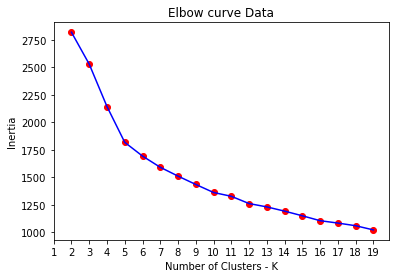

In [58]:
import matplotlib.pyplot as plt

plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of Clusters - K")
plt.ylabel("Inertia")
plt.xticks(range(1,20,1))
plt.title("Elbow curve Data")

# Create model with best K value

In [59]:
km = KMeans(n_clusters=5)
model_clust = km.fit(clust_train) 

# Prepare test data as same as train data

In [60]:
test_data_clst = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [61]:
cat, con  = cat_con_sep(test_data_clst)

In [62]:
test_data_clst = preprocessing_data(test_data_clst,cat,con)

# Predict clusters of data

In [63]:
cluster = model_clust.predict(test_data_clst)

In [64]:
cluster

array([3, 3, 3, 3, 0, 3, 0, 4, 3, 0, 0, 3, 0, 4, 0, 0, 3, 3, 3, 0, 3, 0,
       0, 0, 3, 2, 3, 3, 3, 0, 0, 3, 0, 3, 3, 4, 3, 3, 0, 0, 3, 0, 3, 0,
       0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 4, 0, 3, 4, 3, 3, 3, 0, 4, 3, 3,
       4, 4, 3, 4, 0, 0, 3, 3, 3, 0, 3, 0, 3, 3, 4, 1, 4, 3, 4, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 0, 4, 3, 3, 0, 3, 4, 3, 3, 3,
       0, 3, 0, 3, 3, 0, 0, 4, 4, 4, 0, 3, 3, 4, 4, 0, 4, 3, 0, 3, 3, 0,
       3, 0, 0, 3, 3, 3, 0, 0, 4, 3, 4, 1, 3, 0, 0, 4, 3, 0, 0, 3, 0, 4,
       3, 0, 3, 3, 0, 3, 0, 4, 0, 0, 0, 4, 4, 3, 4, 3, 0, 3, 3, 4, 4, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 4, 3, 0, 4, 3,
       4, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 4, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 4, 0, 3, 3, 0, 4, 2, 0, 3, 0, 3, 4, 4, 2, 3, 0, 0, 4,
       3, 4, 0, 4, 3, 3, 3, 0, 4, 3, 0, 3, 3, 4, 3, 3, 3, 0, 3, 3, 0, 3,
       3, 0, 4, 0, 4, 0, 3, 0, 1, 4, 4, 3, 3, 0, 4, 1, 0, 3, 0, 0, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 4, 3, 3, 0, 0, 3, 3, 3,

In [65]:
E = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [66]:
E["Cluster"] = cluster

In [67]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster
0,Male,Yes,0,Graduate,No,5720,0,1.00,Urban,3
1,Male,Yes,1,Graduate,No,3076,1500,1.00,Urban,3
2,Male,Yes,2,Graduate,No,5000,1800,1.00,Urban,3
3,Male,Yes,2,Graduate,No,2340,2546,0.83,Urban,3
4,Male,No,0,Not Graduate,No,3276,0,1.00,Urban,0


In [68]:
E.groupby(by="Cluster")["Cluster"].count()

Cluster
0    106
1      4
2      4
3    195
4     58
Name: Cluster, dtype: int64

In [69]:
cls_name = { 
    0:"Good Credit History",
    1:"Good Income and Credit history",
    2:"Bad Credit History",
    3:"Highest Coapplicant Income",
    4:"Highest Applicant Income"
}

In [70]:
tag_clu = []
for i in E.Cluster:
    tag_clu.append(cls_name[i])
    
E["Customer Segmentation"] = tag_clu

In [71]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster,Customer Segmentation
0,Male,Yes,0,Graduate,No,5720,0,1.00,Urban,3,Highest Coapplicant Income
1,Male,Yes,1,Graduate,No,3076,1500,1.00,Urban,3,Highest Coapplicant Income
2,Male,Yes,2,Graduate,No,5000,1800,1.00,Urban,3,Highest Coapplicant Income
3,Male,Yes,2,Graduate,No,2340,2546,0.83,Urban,3,Highest Coapplicant Income
4,Male,No,0,Not Graduate,No,3276,0,1.00,Urban,0,Good Credit History


# 3. If customer is not eligible for the input required amount and duration:

# a. what can be amount for the given duration.

# Get data which have Loan_Status is yes

In [72]:
train_data1 = A[A["Loan_Status"]=="Y"]

# Indexing properly

In [73]:
len_train_data1 = train_data1.shape[0]
train_data1.index = range(0,len_train_data1,1)

# Remove Unwanted column

In [74]:
train_data1 = train_data1.drop(labels="Loan_Status",axis=1)

# Declare X and Y

In [75]:
X = train_data1.drop(labels="LoanAmount",axis=1)
Y = train_data1[["LoanAmount"]]

# EDA

# 1)Unvariant

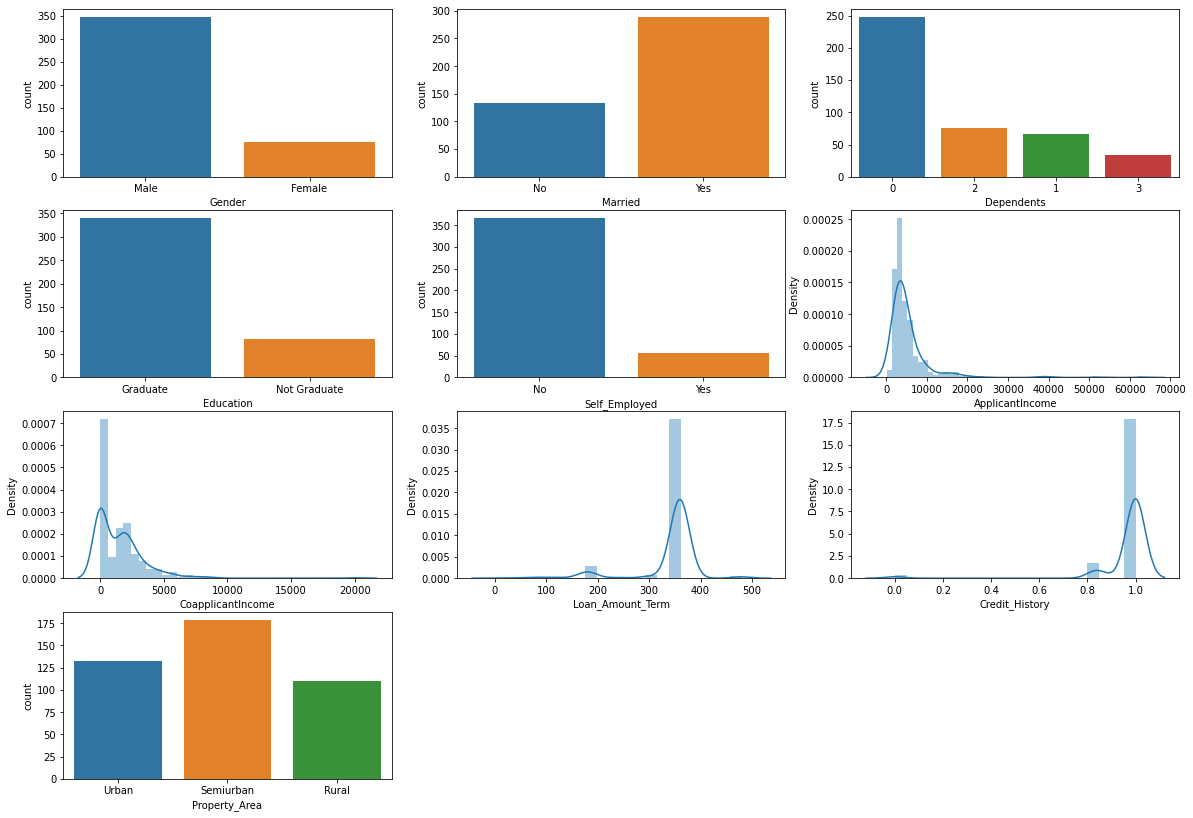

In [76]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

# 2)Bivariant

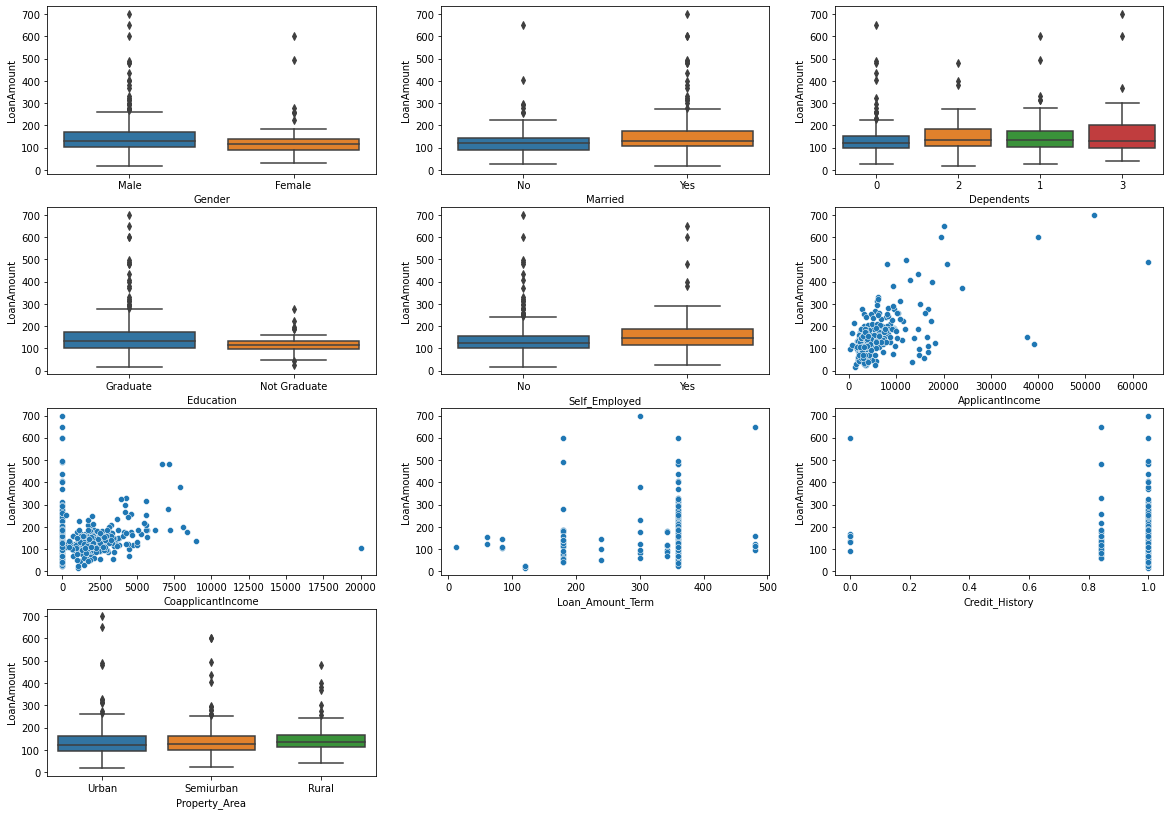

In [77]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.boxplot(X[i],Y.LoanAmount)
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.scatterplot(X[i],Y.LoanAmount)
        q = q + 1

# Data Preprocessing

In [78]:
cat, con = cat_con_sep(X)

In [79]:
X[con].skew()

ApplicantIncome      5.500304
CoapplicantIncome    3.042653
Loan_Amount_Term    -2.619580
Credit_History      -6.403561
dtype: float64

In [80]:
from numpy import log, sqrt
X.ApplicantIncome = log(X.ApplicantIncome)
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)

In [81]:
X[con].skew()

ApplicantIncome      0.694509
CoapplicantIncome    0.351333
Loan_Amount_Term    -2.619580
Credit_History      -6.403561
dtype: float64

In [82]:
X = preprocessing_data(X,cat,con)

# Divide X and Y into training and testing data

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)

# Creating ML Models and choose one of the best

# 1) Multiple Linear Regressor Model

In [84]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm1_model = lm.fit(xtrain,ytrain)

# Calculating train and test error

In [85]:
from sklearn.metrics import mean_absolute_error

pred_tr_lm1model = lm1_model.predict(xtrain)
err_tr_lm1model = round(mean_absolute_error(ytrain,pred_tr_lm1model),4)
print("MLR Training MAE: ",err_tr_lm1model)

pred_ts_lm1model = lm1_model.predict(xtest)

err_ts_lm1model = round(mean_absolute_error(ytest,pred_ts_lm1model),4)
print("MLR Testing MAE: ",err_ts_lm1model)

MLR Training MAE:  39.6323
MLR Testing MAE:  36.9077


# Check collinearity

In [86]:
X.corr()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.359967,-0.100766,-0.030380,-0.064333,0.064333,-0.026420,0.026420,-0.155161,0.064852,0.019814,0.168624,0.179037,-0.179037,-0.229608,0.229608,-0.020304,-0.010096,0.029926
CoapplicantIncome,-0.359967,1.000000,0.061589,-0.033890,-0.208240,0.208240,-0.243592,0.243592,0.040999,-0.040114,0.072589,-0.124854,0.000261,-0.000261,0.072563,-0.072563,0.088023,-0.014162,-0.068110
Loan_Amount_Term,-0.100766,0.061589,1.000000,0.069171,0.085819,-0.085819,0.104130,-0.104130,0.081389,-0.042534,-0.031030,-0.047392,0.040525,-0.040525,0.010387,-0.010387,0.043834,0.088347,-0.135402
Credit_History,-0.030380,-0.033890,0.069171,1.000000,-0.014077,0.014077,-0.012841,0.012841,0.025967,0.002958,0.016910,-0.075854,0.004006,-0.004006,-0.039397,0.039397,-0.009371,-0.010026,0.019520
Gender_Female,-0.064333,-0.208240,0.085819,-0.014077,1.000000,-1.000000,0.361989,-0.361989,0.152266,0.021676,-0.137232,-0.112321,0.008984,-0.008984,0.017406,-0.017406,-0.078364,0.127774,-0.061876
Gender_Male,0.064333,0.208240,-0.085819,0.014077,-1.000000,1.000000,-0.361989,0.361989,-0.152266,-0.021676,0.137232,0.112321,-0.008984,0.008984,-0.017406,0.017406,0.078364,-0.127774,0.061876
Married_No,-0.026420,-0.243592,0.104130,-0.012841,0.361989,-0.361989,1.000000,-1.000000,0.346842,-0.111515,-0.253452,-0.122834,-0.025243,0.025243,0.011734,-0.011734,0.035611,-0.008640,-0.024458
Married_Yes,0.026420,0.243592,-0.104130,0.012841,-0.361989,0.361989,-1.000000,1.000000,-0.346842,0.111515,0.253452,0.122834,0.025243,-0.025243,-0.011734,0.011734,-0.035611,0.008640,0.024458
Dependents_0,-0.155161,0.040999,0.081389,0.025967,0.152266,-0.152266,0.346842,-0.346842,1.000000,-0.511536,-0.556799,-0.346028,0.060723,-0.060723,0.067731,-0.067731,0.050576,0.021702,-0.070877
Dependents_1,0.064852,-0.040114,-0.042534,0.002958,0.021676,-0.021676,-0.111515,0.111515,-0.511536,1.000000,-0.201797,-0.125409,-0.019379,0.019379,-0.023878,0.023878,-0.121915,0.013263,0.101092


<AxesSubplot:>

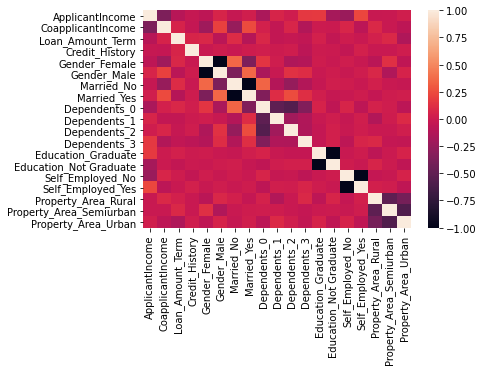

In [87]:
sb.heatmap(X.corr())

# 2)Ridge Model

# Finding best value for alpha using GridSearchCV

In [88]:
from sklearn.linear_model import Ridge

w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
rr = Ridge()
tp = {"alpha":w}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)

In [89]:
cvmodel.best_params_

{'alpha': 1.1}

# Creating Ridge Model

In [90]:
rr1 = Ridge(alpha=1.1)
model_rr1 = rr1.fit(xtrain,ytrain)

# Calculating train and test error

In [91]:
pred_tr_modelrr1 = model_rr1.predict(xtrain)
err_tr_modelrr1 = round(mean_absolute_error(ytrain,pred_tr_modelrr1),4)
print("Ridge Training MAE: ",err_tr_modelrr1)

pred_ts_modelrr1 = model_rr1.predict(xtest)
err_ts_modelrr1 = round(mean_absolute_error(ytest,pred_ts_modelrr1),4)
print("Ridge Testing MAE: ",err_ts_modelrr1)

Ridge Training MAE:  39.604
Ridge Testing MAE:  36.8004


# 3)Lasso Model

# Finding best value for alpha using GridSearchCV

In [92]:
from sklearn.linear_model import Lasso

w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
la = Lasso()
tp = {"alpha":w}
cv = GridSearchCV(la,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.1}

# Creating Lasso Model

In [93]:
la1 = Lasso(alpha=1.1)
model_la1 = la1.fit(xtrain,ytrain)

# Calculating train and test error

In [94]:
pred_tr_modella1 = model_la1.predict(xtrain)
err_tr_modella1 = round(mean_absolute_error(ytrain,pred_tr_modella1),4)
print("Lasso Training MAE: ",err_tr_modella1)

pred_ts_modella1 = model_la1.predict(xtest)
err_ts_modella1 = round(mean_absolute_error(ytest,pred_ts_modella1),4)
print("Lasso Testing MAE: ",err_ts_modella1)

Lasso Training MAE:  39.1841
Lasso Testing MAE:  35.8646


# 4)Decision Tree Model

In [95]:
from sklearn.tree import DecisionTreeRegressor
dtr1  = DecisionTreeRegressor(random_state=21)
model_dtr1 = dtr1.fit(xtrain,ytrain)

# Calculating train and test error

In [96]:
pred_tr_modeldtr1 = model_dtr1.predict(xtrain)
err_tr_modeldtr1 = round(mean_absolute_error(ytrain,pred_tr_modeldtr1),4)
print("Decision Tree Training MAE: ",err_tr_modeldtr1)

pred_ts_modeldtr1 = model_dtr1.predict(xtest)
err_ts_modeldtr1 = round(mean_absolute_error(ytest,pred_ts_modeldtr1),4)
print("Decision Tree Testing MAE: ",err_ts_modeldtr1)

Decision Tree Training MAE:  0.0
Decision Tree Testing MAE:  53.6305


# 5)Random Forest Model

# Finding best value for n Estimators, max depth using GridSearchCV

In [97]:
from sklearn.ensemble import RandomForestRegressor

tg = {"max_depth":range(2,15,1),"n_estimators":range(2,15,1)}
rfr = RandomForestRegressor(random_state=21)
cv = GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 4, 'n_estimators': 14}

# Creating Random Forest Model

In [98]:
rfo1 = RandomForestRegressor(n_estimators=14, random_state=21, max_depth=4)
model_rfr1 = rfo1.fit(xtrain,ytrain)

# Calculating train and test error

In [99]:
pred_tr_modelrfr1 = model_rfr1.predict(xtrain)
err_tr_modelrfr1 = round(mean_absolute_error(ytrain,pred_tr_modelrfr1),4)
print("Random Forest Training MAE: ",err_tr_modelrfr1)

pred_ts_modelrfr1 = model_rfr1.predict(xtest)
err_ts_modelrfr1 = round(mean_absolute_error(ytest,pred_ts_modelrfr1),4)
print("Random Forest Testing MAE: ",err_ts_modelrfr1)

Random Forest Training MAE:  31.6911
Random Forest Testing MAE:  32.9811


# 6)Adaboost Regression Model

# Finding best value for n Estimators using GridSearchCV

In [100]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

tg = {"n_estimators":range(2,15,1)}
abm = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abm,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 4}

# Creating Adaboost Regression Model

In [101]:
boost1 = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=4,random_state=21)
model_adr1 = boost1.fit(xtrain,ytrain)

# Calculating train and test error

In [102]:
pred_tr_modeladr1 = model_adr1.predict(xtrain)
err_tr_modeladr1 = round(mean_absolute_error(ytrain,pred_tr_modeladr1),4)
print("Adaboost Regressor Training MAE: ",err_tr_modeladr1)

pred_ts_modeladr1 = model_adr1.predict(xtest)
err_ts_modeladr1 = round(mean_absolute_error(ytest,pred_ts_modeladr1),4)
print("Adaboost Regressor Testing MAE: ",err_ts_modeladr1)

Adaboost Regressor Training MAE:  42.8191
Adaboost Regressor Testing MAE:  33.1322


# 7)KNN Regression Model

# Finding best value for n neighbors using GridSearchCV

In [103]:
from sklearn.neighbors import KNeighborsRegressor

tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsRegressor()
cv = GridSearchCV(knn,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 12}

# Creating KNN Model

In [104]:
kn1 = KNeighborsRegressor(n_neighbors=12)
model_knnr1 = kn1.fit(xtrain,ytrain)

# Calculating train and test error

In [105]:
pred_tr_modelknnr1 = model_knnr1.predict(xtrain)
err_tr_modelknnr1 = round(mean_absolute_error(ytrain,pred_tr_modelknnr1),4)
print("KNN Regressor Training MAE: ",err_tr_modelknnr1)

pred_ts_modelknnr1 = model_knnr1.predict(xtest)
err_ts_modelknnr1 = round(mean_absolute_error(ytest,pred_ts_modelknnr1),4)
print("KNN Regressor Testing MAE: ",err_ts_modelknnr1)

KNN Regressor Training MAE:  40.0139
KNN Regressor Testing MAE:  33.6829


# Random Forest Model is the best among all models

# Train Random Forest Model with overall trainning data

In [106]:
rfrm1 = RandomForestRegressor(n_estimators=14, random_state=21, max_depth=4)
model_rfr1_fin = rfrm1.fit(X,Y)

# Prepare testing data same as trainning data

In [107]:
test_data2 = B[B["Loan_Status"]=="N"]

# Indexing

In [108]:
len_test_data2 = test_data2.shape[0]
test_data2.index = range(0,len_test_data2,1)

# Remove Unwanted Columns

In [109]:
test_data2 = test_data2.drop(labels=["LoanAmount","Loan_Status"],axis=1)

# Data Preprocessing

In [110]:
cat, con = cat_con_sep(test_data2)

In [111]:
test_data2 = preprocessing_data(test_data2,cat,con)

# Predicting Loan Amount

In [112]:
predicted_LoanAmount = model_rfr1_fin.predict(test_data2)

In [113]:
pred_la = []
for i in predicted_LoanAmount:
    pred_la.append(round(i,2))

In [114]:
C = B[B["Loan_Status"]=="N"]
len_C = C.shape[0]
C.index = range(0,len_C,1)

In [115]:
C = C.drop(labels=["LoanAmount","Loan_Status"],axis=1)

In [116]:
C[["LoanAmount"]] = pred_la

In [117]:
C.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural,107.96
1,Male,Yes,2,Graduate,No,12173,0,360.0,0.0,Semiurban,174.41
2,Female,No,3,Not Graduate,No,2083,0,180.0,1.0,Urban,94.63


# b. If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?

In [118]:
train_data2 = A[(A["Loan_Status"]=="Y") & (A["Loan_Amount_Term"]>240.0)]

# Indexing

In [119]:
len_train_data2 = train_data2.shape[0]
train_data2.index = range(0,len_train_data2,1)

# Drop Unnecessary Columns

In [120]:
train_data2 = train_data2.drop(labels=["Loan_Status"],axis=1)

In [121]:
X = train_data2.drop(labels=["Loan_Amount_Term"],axis=1)
Y = train_data2[["Loan_Amount_Term"]]

# Convert Dependents columns into continuous

In [122]:
dep1 = []
for i in X.Dependents:
    dep1.append(int(i))

X[["Dependents"]] = dep1

In [123]:
loan_term = []
for i in Y.Loan_Amount_Term:
    loan_term.append(int(i))
    
Y["Loan_Amount_Term"] = loan_term

# EDA

# 1)Univariant

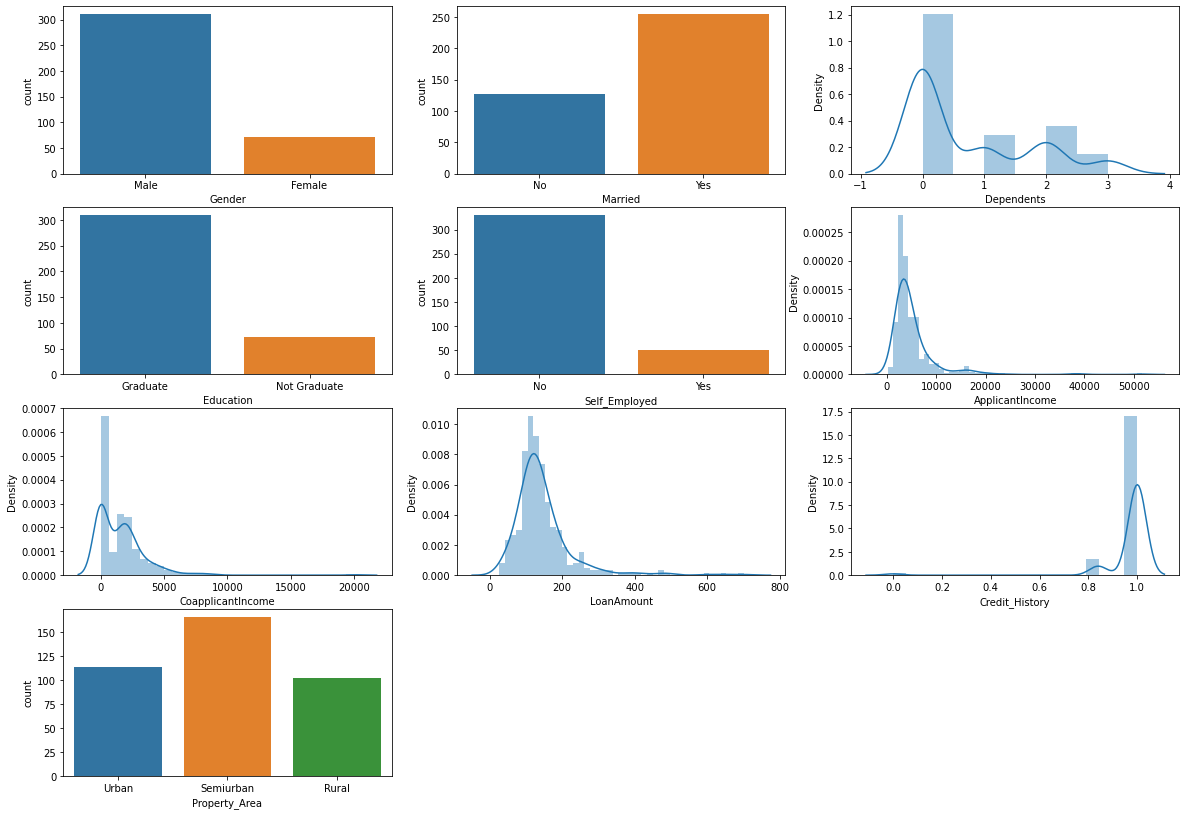

In [124]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

# 2)Bivariant

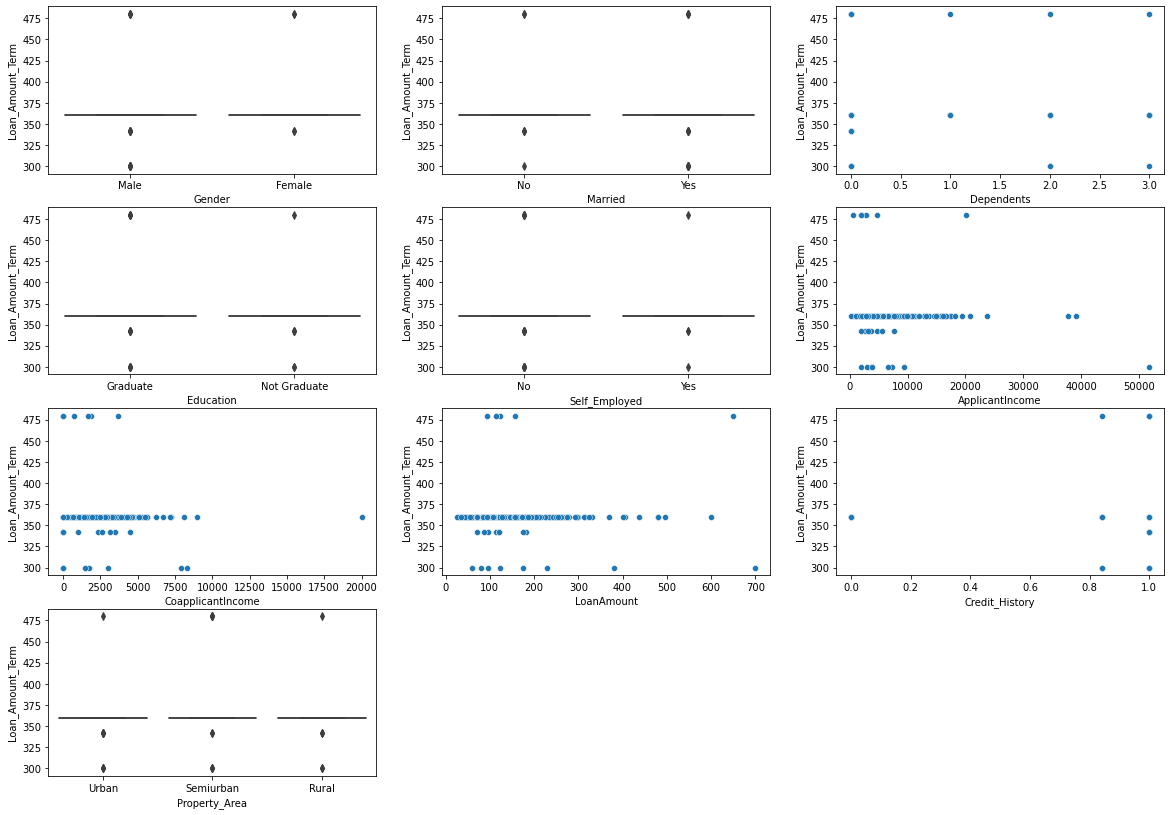

In [125]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.boxplot(X[i],Y.Loan_Amount_Term)
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.scatterplot(X[i],Y.Loan_Amount_Term)
        q = q + 1

# Data Preprocessing

In [126]:
cat, con = cat_con_sep(X)

In [127]:
X[con].skew()

Dependents           1.018780
ApplicantIncome      4.759015
CoapplicantIncome    3.163921
LoanAmount           3.026631
Credit_History      -6.938382
dtype: float64

In [128]:
X.ApplicantIncome = log(X.ApplicantIncome)
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X.Dependents = sqrt(X.Dependents)

In [129]:
X[con].skew()

Dependents           0.608876
ApplicantIncome      0.532392
CoapplicantIncome    0.303109
LoanAmount           0.151099
Credit_History      -6.938382
dtype: float64

In [130]:
cat.remove("Property_Area")

In [131]:
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [132]:
lb1 = LabelEncoder()
ss1 = StandardScaler()
X1 = pd.DataFrame(lb1.fit_transform(X["Gender"]),columns=["Gender"])
X2 = pd.get_dummies(X["Property_Area"])
X3 = X1.join(X2)
X4 = pd.DataFrame(lb1.fit_transform(X["Married"]),columns=["Married"])
X5 = pd.DataFrame(lb1.fit_transform(X["Education"]),columns=["Education"])
X6 = X4.join(X5)
X7 = pd.DataFrame(lb1.fit_transform(X["Self_Employed"]),columns=["Self_Employed"])
X8 = X6.join(X7)
X9 = X8.join(X3)
X10 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X = X10.join(X9)

# Divide X and Y into training and testing

In [133]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)

# Creating ML Models and choose one of the best

# 1) Multiple Linear Regressor Model

In [134]:
lm2 = LinearRegression()
lm2_model = lm2.fit(xtrain,ytrain)

# Calculating tarin and test error

In [135]:
pred_tr_lm2model = lm2_model.predict(xtrain)
err_tr_lm2model = round(mean_absolute_error(ytrain,pred_tr_lm2model),4)
print("MLR Training MAE: ",err_tr_lm2model)

pred_ts_lm2model = lm2_model.predict(xtest)
err_ts_lm2model = round(mean_absolute_error(ytest,pred_ts_lm2model),4)
print("MLR Testing MAE: ",err_ts_lm2model)

MLR Training MAE:  7.0562
MLR Testing MAE:  5.6849


# Check Collinearity

In [136]:
X.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Rural,Semiurban,Urban
Dependents,1.000000,0.176300,-0.046527,0.169422,-0.027765,0.348830,0.054317,0.076944,0.177344,-0.010752,-0.010796,0.022142
ApplicantIncome,0.176300,1.000000,-0.350550,0.496044,0.016553,-0.001328,-0.176204,0.247390,0.062626,-0.022151,-0.000099,0.021580
CoapplicantIncome,-0.046527,-0.350550,1.000000,0.133966,-0.044035,0.264678,-0.000562,-0.064459,0.235373,0.104411,-0.038713,-0.059188
LoanAmount,0.169422,0.496044,0.133966,1.000000,-0.042152,0.205778,-0.156998,0.159810,0.177050,0.089795,-0.025874,-0.058957
Credit_History,-0.027765,0.016553,-0.044035,-0.042152,1.000000,0.036792,-0.025866,0.038042,0.036439,0.017380,-0.009240,-0.006817
Married,0.348830,-0.001328,0.264678,0.205778,0.036792,1.000000,-0.014222,0.016352,0.376532,-0.050300,0.014972,0.032506
Education,0.054317,-0.176204,-0.000562,-0.156998,-0.025866,-0.014222,1.000000,-0.012558,-0.010032,0.101820,-0.005004,-0.093270
Self_Employed,0.076944,0.247390,-0.064459,0.159810,0.038042,0.016352,-0.012558,1.000000,0.009976,0.040850,0.012118,-0.052755
Gender,0.177344,0.062626,0.235373,0.177050,0.036439,0.376532,-0.010032,0.009976,1.000000,0.076237,-0.109643,0.045124
Rural,-0.010752,-0.022151,0.104411,0.089795,0.017380,-0.050300,0.101820,0.040850,0.076237,1.000000,-0.531291,-0.392618


<AxesSubplot:>

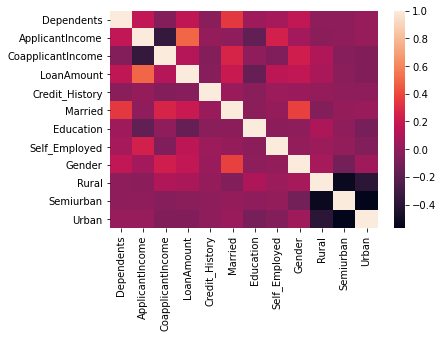

In [137]:
sb.heatmap(X.corr())

# 2)Ridge Model

# Finding best alpha value using GridSearchCV

In [138]:
w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
rr = Ridge()
tp = {"alpha":w}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.1}

# Creating Ridge Model

In [139]:
rr2 = Ridge(alpha=1.1)
model_rr2 = rr2.fit(xtrain,ytrain)

# Calculating train and test error

In [140]:
pred_tr_modelrr2 = model_rr2.predict(xtrain)
err_tr_modelrr2 = round(mean_absolute_error(ytrain,pred_tr_modelrr2),4)
print("Ridge Training MAE: ",err_tr_modelrr2)

pred_ts_modelrr2 = model_rr2.predict(xtest)
err_ts_modelrr2 = round(mean_absolute_error(ytest,pred_ts_modelrr2),4)
print("Ridge Testing MAE: ",err_ts_modelrr2)

Ridge Training MAE:  7.018
Ridge Testing MAE:  5.6355


# 3)Lasso Model

# Finding best alpha value using GridSearchCV

In [141]:
w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
la = Lasso()
tp = {"alpha":w}
cv = GridSearchCV(la,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.1}

# Creating Lasso Model

In [142]:
la2 = Lasso(alpha=1.1)
model_la2 = la2.fit(xtrain,ytrain)

# Predicting train and test error

In [143]:
pred_tr_modella2 = model_la2.predict(xtrain)
err_tr_modella2 = round(mean_absolute_error(ytrain,pred_tr_modella2),4)
print("Lasso Training MAE: ",err_tr_modella1)

pred_ts_modella2 = model_la2.predict(xtest)
err_ts_modella2 = round(mean_absolute_error(ytest,pred_ts_modella2),4)
print("Lasso Testing MAE: ",err_ts_modella2)

Lasso Training MAE:  39.1841
Lasso Testing MAE:  2.3311


# 4)Decision Tree Model

In [144]:
dtr2  = DecisionTreeRegressor(random_state=21)
model_dtr2 = dtr2.fit(xtrain,ytrain)

# Calculating train and test error

In [145]:
pred_tr_modeldtr2 = model_dtr2.predict(xtrain)
err_tr_modeldtr2 = round(mean_absolute_error(ytrain,pred_tr_modeldtr2),4)
print("Decision Tree Training MAE: ",err_tr_modeldtr2)

pred_ts_modeldtr2 = model_dtr2.predict(xtest)
err_ts_modeldtr2 = round(mean_absolute_error(ytest,pred_ts_modeldtr2),4)
print("Decision Tree Testing MAE: ",err_ts_modeldtr2)

Decision Tree Training MAE:  0.0
Decision Tree Testing MAE:  7.2468


# 5)Random Forest Model

# Finding best value for n Estimators, max depth using GridSearchCV

In [146]:
tg = {"max_depth":range(2,15,1),"n_estimators":range(2,15,1)}
rfr = RandomForestRegressor(random_state=21)
cv = GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 2, 'n_estimators': 8}

# Creating Random Forest Model

In [147]:
rfo2 = RandomForestRegressor(n_estimators=8, random_state=21, max_depth=2)
model_rfr2 = rfo2.fit(xtrain,ytrain)

# Calculating train and test error

In [148]:
pred_tr_modelrfr2 = model_rfr2.predict(xtrain)
err_tr_modelrfr2 = round(mean_absolute_error(ytrain,pred_tr_modelrfr2),4)
print("Random Forest Training MAE: ",err_tr_modelrfr2)

pred_ts_modelrfr2 = model_rfr2.predict(xtest)
err_ts_modelrfr2 = round(mean_absolute_error(ytest,pred_ts_modelrfr2),4)
print("Random Forest Testing MAE: ",err_ts_modelrfr2)

Random Forest Training MAE:  3.8898
Random Forest Testing MAE:  4.1571


# 6)Adaboost Regression Model

# Finding best value for n Estimators using GridSearchCV

In [149]:
tg = {"n_estimators":range(2,15,1)}
abm = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abm,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 2}

# Creating Adaboost Regression

In [150]:
boost2 = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=2,random_state=21)
model_adr2 = boost2.fit(xtrain,ytrain)

# Calculating train and test error

In [151]:
pred_tr_modeladr2 = model_adr2.predict(xtrain)
err_tr_modeladr2 = round(mean_absolute_error(ytrain,pred_tr_modeladr2),4)
print("Adaboost Regressor Training MAE: ",err_tr_modeladr2)

pred_ts_modeladr2 = model_adr2.predict(xtest)
err_ts_modeladr2 = round(mean_absolute_error(ytest,pred_ts_modeladr2),4)
print("Adaboost Regressor Testing MAE: ",err_ts_modeladr2)

Adaboost Regressor Training MAE:  4.212
Adaboost Regressor Testing MAE:  3.1747


# 7)KNN Regression Model

# Finding best value n neighbors using GridSearchCV

In [152]:
tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsRegressor()
cv = GridSearchCV(knn,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 7}

# Making of KNN model

In [153]:
kn2 = KNeighborsRegressor(n_neighbors=10)
model_knnr2 = kn2.fit(xtrain,ytrain)

# Calculating train and test error

In [154]:
pred_tr_modelknnr2 = model_knnr2.predict(xtrain)
err_tr_modelknnr2 = round(mean_absolute_error(ytrain,pred_tr_modelknnr2),4)
print("KNN Regressor Training MAE: ",err_tr_modelknnr2)

pred_ts_modelknnr2 = model_knnr2.predict(xtest)
err_ts_modelknnr2 = round(mean_absolute_error(ytest,pred_ts_modelknnr2),4)
print("KNN Regressor Testing MAE: ",err_ts_modelknnr2)

KNN Regressor Training MAE:  6.1184
KNN Regressor Testing MAE:  4.1688


# Adaboost Regression Model is best model as compared to others

# Train Adaboost Regression Model with overall trainning data

In [155]:
booster = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=2,random_state=21)
model_adr2_fin = booster.fit(X,Y)

# Prepare testing data same as trainning data

In [156]:
test_data3 = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]

# Indexing

In [157]:
len_test_data3 = test_data3.shape[0]
test_data3.index = range(0,len_test_data3,1)

# Delete Unwanted Columns

In [158]:
test_data3 = test_data3.drop(labels=["Loan_Status","Loan_Amount_Term"],axis=1)

# Convert Dependents columns type into continuous

In [159]:
test_dep = []
for i in test_data3.Dependents:
    test_dep.append(int(i))
    
test_data3["Dependents"] = test_dep

# Data Preprocessing

In [160]:
cat, con = cat_con_sep(test_data3)

In [161]:
cat.remove("Property_Area")
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [162]:
input1 = pd.get_dummies(test_data3["Property_Area"])
input2 = pd.DataFrame(lb1.fit_transform(test_data3["Gender"]),columns=["Gender"])
out1 = input2.join(input1)
input3 = pd.DataFrame(lb1.fit_transform(test_data3["Self_Employed"]),columns=["Self_Employed"])
input4 = pd.DataFrame(lb1.fit_transform(test_data3["Education"]),columns=["Education"])
out2 = input4.join(input3)
input5 = pd.DataFrame(lb1.fit_transform(test_data3["Married"]),columns=["Married"])
out3 = input5.join(out2)
out4 = out3.join(out1)

x_con = pd.DataFrame(ss1.fit_transform(test_data3[con]),columns=con)

test_data3 = x_con.join(out4)

In [163]:
test_data3

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Rural,Semiurban,Urban
0,1.154701,-1.416412,-0.890288,-1.909403,1.581139,0,1,0,0,0,0,1
1,-0.866025,0.966414,-0.890288,0.362345,-0.632456,1,0,0,1,0,1,0
2,-0.866025,-0.478545,1.173029,0.979908,-0.632456,0,0,0,1,0,0,1
3,-0.866025,-0.308845,1.390602,0.781406,-0.632456,1,0,0,1,0,1,0
4,-0.866025,-0.621133,0.861900,-0.431664,-0.632456,0,0,0,1,0,1,0
5,1.154701,0.028546,-0.890288,-0.740445,1.581139,1,1,0,1,1,0,0
6,1.154701,1.829975,-0.754667,0.957852,-0.632456,1,1,0,1,0,1,0


# Predicting Loan Amount Term

In [164]:
pred_loan_amount_term = model_adr2_fin.predict(test_data3)

In [165]:
la_term = []
for i in pred_loan_amount_term:
    la_term.append(round(i))

In [166]:
la_term

[360, 352, 352, 352, 352, 360, 352]

In [167]:
D = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]

In [168]:
len_D = D.shape[0]
D.index = range(0,len_D,1)

In [169]:
D = D.drop(labels=["Loan_Amount_Term","Loan_Status"],axis=1)

In [170]:
D["Loan_Amount_Term"] = la_term

In [171]:
D

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term
0,Female,No,3,Not Graduate,No,2083,0,28.0,1.0,Urban,360
1,Male,Yes,0,Graduate,No,4456,0,131.0,0.0,Semiurban,352
2,Male,No,0,Graduate,No,3017,2845,159.0,0.0,Urban,352
3,Male,Yes,0,Graduate,No,3186,3145,150.0,0.0,Semiurban,352
4,Male,No,0,Graduate,No,2875,2416,95.0,0.0,Semiurban,352
5,Male,Yes,3,Not Graduate,No,3522,0,81.0,1.0,Rural,360
6,Male,Yes,3,Not Graduate,No,5316,187,158.0,0.0,Semiurban,352
